# Coeficiente de Pearson (Coeficiente de correlação produto-momento)

In [1]:
import os
import time
import pandas as pd
import numpy as np
import seaborn as sn

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
FILE_CSV = os.path.join('trabalho4', 'csv', 'trabalho4.csv')

dados = pd.read_csv(FILE_CSV)

## Pearson

<AxesSubplot: >

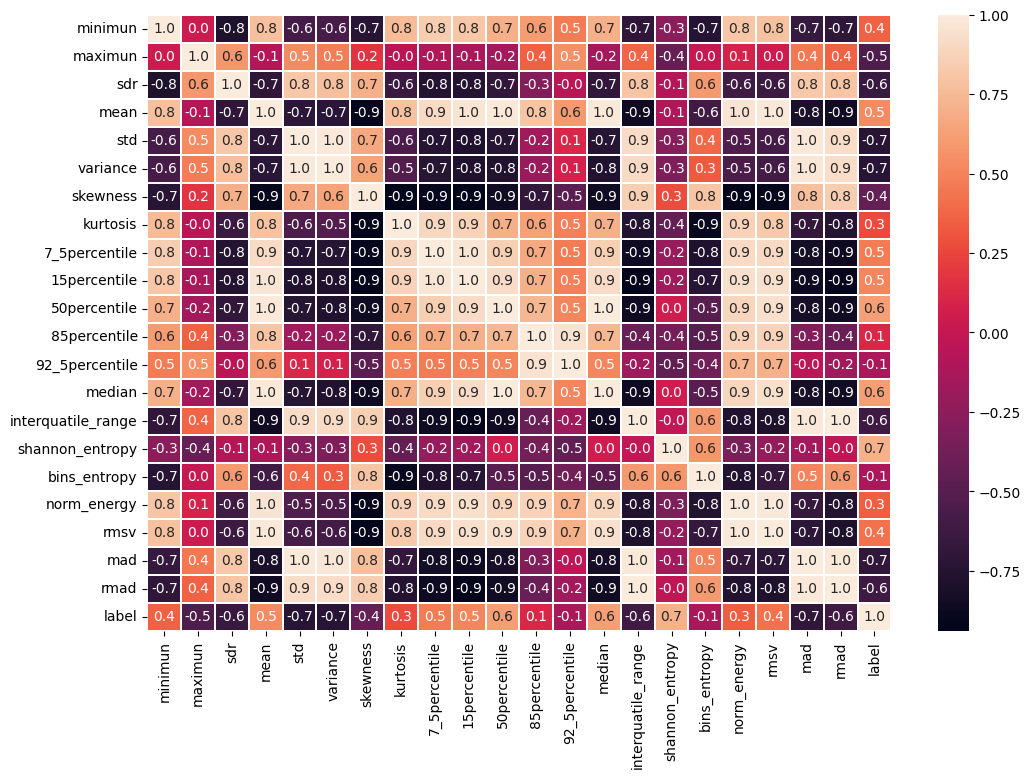

In [3]:
correlation = dados.corr()

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.1)
plot.figure.set_size_inches(12, 8)
plot

## Kendall

<AxesSubplot: >

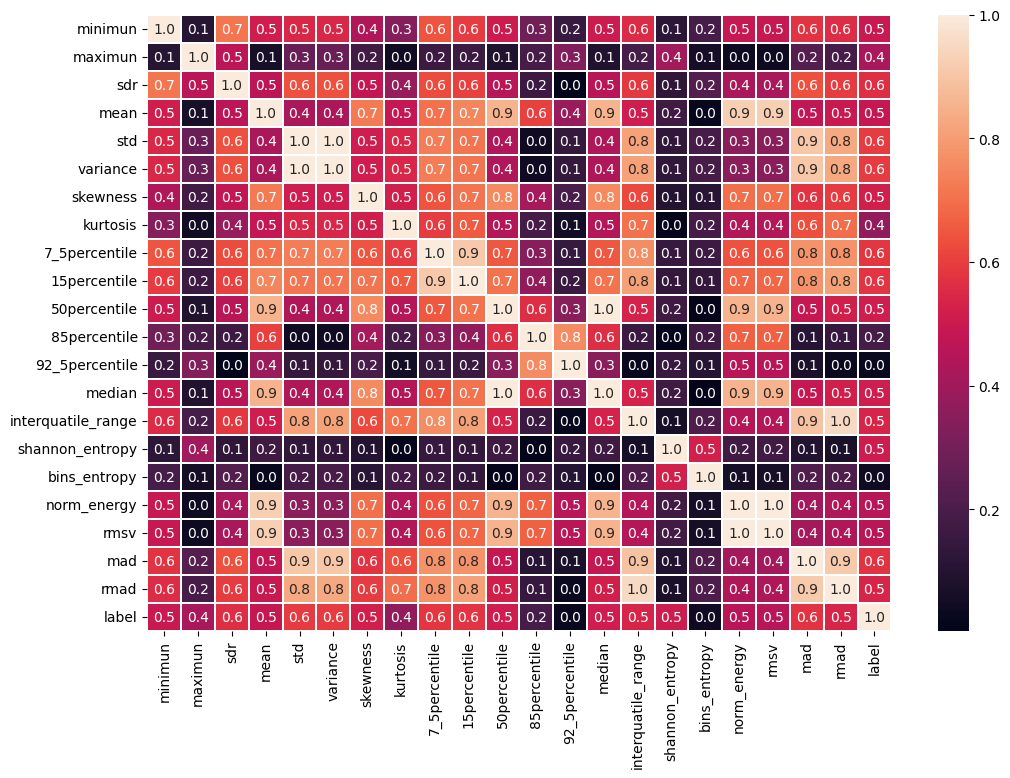

In [4]:
correlation2 = dados.corr(method='kendall').abs()

plot = sn.heatmap(correlation2, annot = True, fmt=".1f", linewidths=.1)
plot.figure.set_size_inches(12, 8)
plot

## Spearman

<AxesSubplot: >

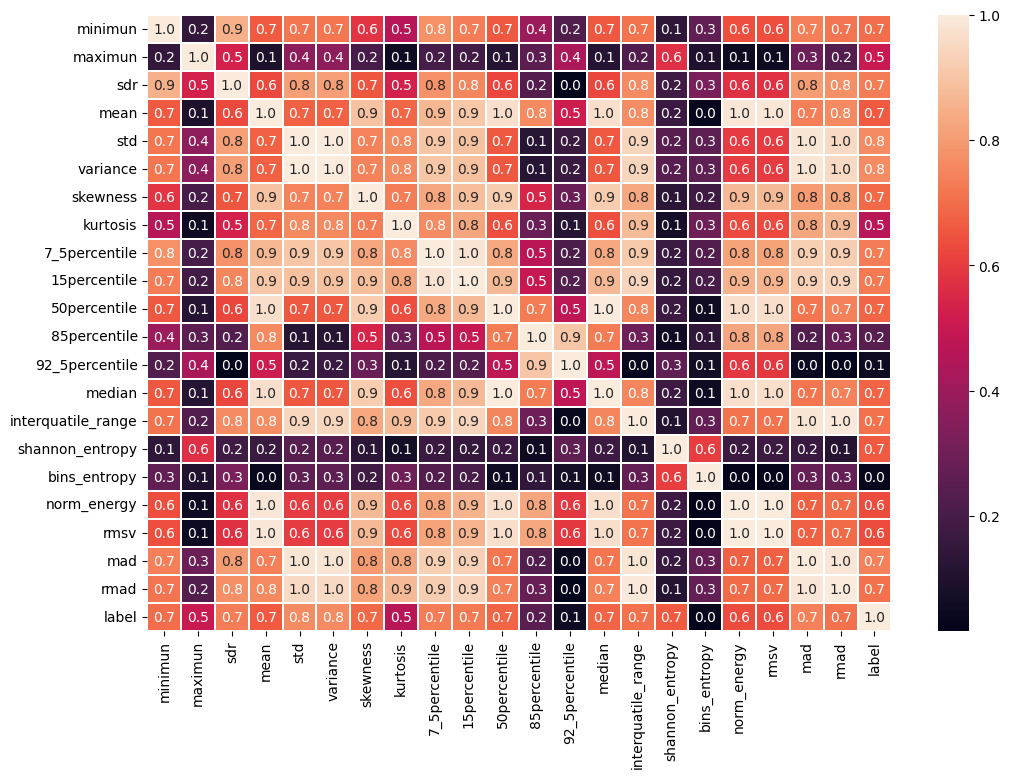

In [5]:
correlation3 = dados.corr(method="spearman").abs()

plot = sn.heatmap(correlation3, annot = True, fmt=".1f", linewidths=.1)
plot.figure.set_size_inches(12, 8)
plot

<AxesSubplot: >

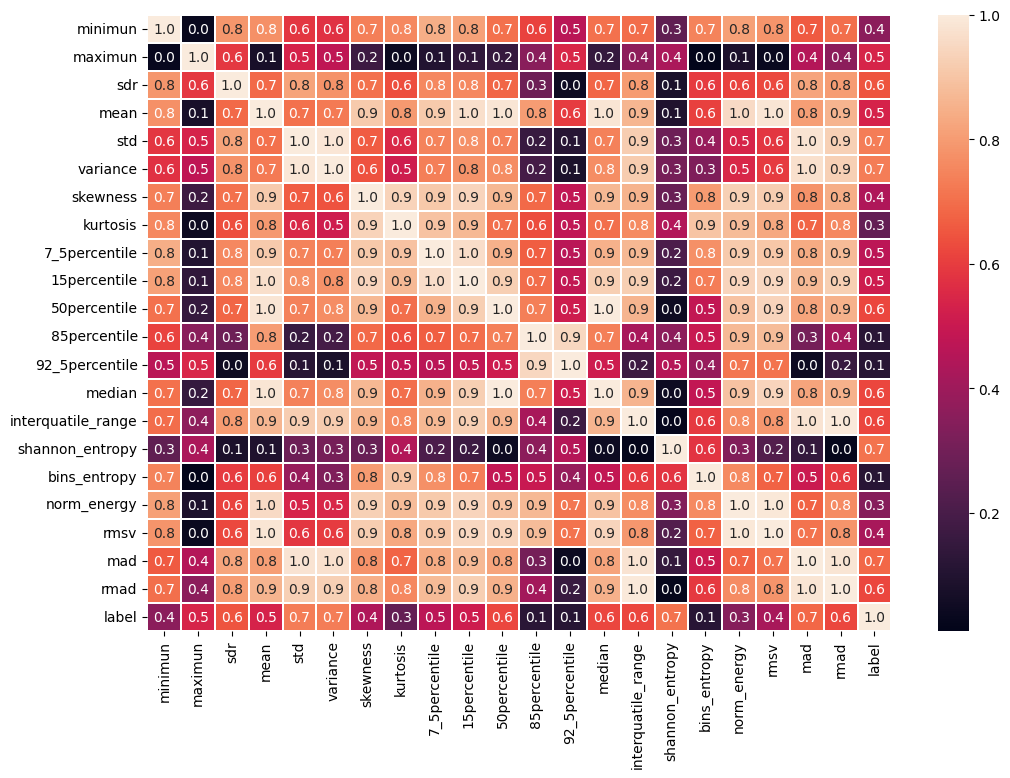

In [6]:
correlation = dados.corr().abs()

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.1)
plot.figure.set_size_inches(12, 8)
plot

<AxesSubplot: >

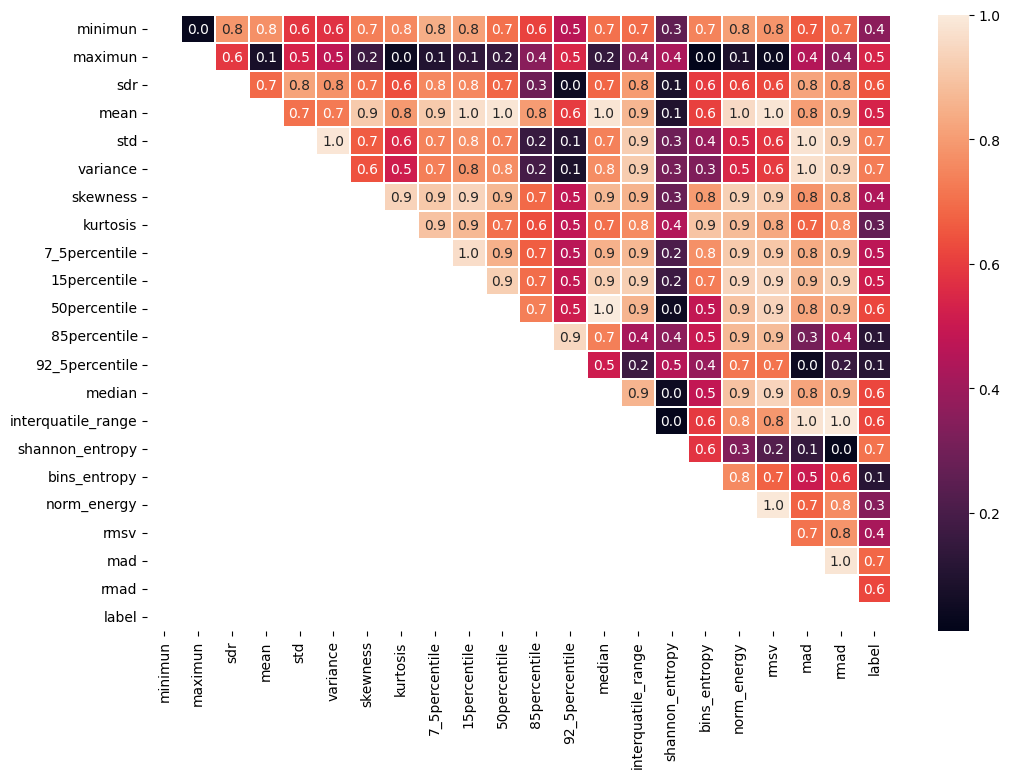

In [7]:
upper_tri = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(bool))

plot = sn.heatmap(upper_tri, annot = True, fmt=".1f", linewidths=.1)
plot.figure.set_size_inches(12, 8)
plot

In [8]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print()
print(to_drop)


['variance', '15percentile', '50percentile', 'median', 'norm_energy', 'rmsv', 'mad', 'rmad']


In [9]:
to_drop2 = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print()
print(to_drop2)


['variance', 'skewness', 'kurtosis', '7_5percentile', '15percentile', '50percentile', '92_5percentile', 'median', 'interquatile_range', 'norm_energy', 'rmsv', 'mad', 'rmad']


In [10]:
dados

,minimun,maximun,sdr,mean,std,variance,skewness,kurtosis,7_5percentile,15percentile,...,92_5percentile,median,interquatile_range,shannon_entropy,bins_entropy,norm_energy,rmsv,mad,rmad,label
0,26.0229,169.1154,20475.4636,122.7868,22.3064,497.5765,-0.5952,0.2747,89.7427,99.9124,...,153.0784,124.9825,29.8723,11.0848,2.5006,15574.1688,124.7965,17.8472,12.5784,4
1,1.8240,193.4827,36733.0573,156.3602,17.5593,308.3285,-1.3643,4.2281,128.3483,140.5060,...,176.7770,159.0715,20.8149,11.7131,2.0932,24756.8312,157.3430,13.2183,8.7030,4
2,5.4567,201.4406,38409.6891,116.9324,56.4432,3185.8330,-0.2203,-1.4440,33.2270,46.4950,...,186.3712,126.0147,108.0454,12.7788,3.4540,16859.0212,129.8423,51.2397,43.7203,4
3,39.4419,203.0304,26761.1973,132.8929,37.9159,1437.6168,-0.6347,-1.0915,69.2603,81.6243,...,171.7992,152.4852,67.1136,12.4627,2.7592,19098.1500,138.1961,33.9557,27.8841,4
4,19.4321,174.0565,23908.7051,139.5543,18.1011,327.6500,-3.5461,15.5356,125.5883,132.0607,...,154.2973,142.7715,12.9278,9.7521,1.6213,19803.0553,140.7233,10.2962,5.4564,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,98.3548,254.9745,24529.7304,247.4564,29.4046,864.6292,-3.7524,12.3572,254.9745,254.9745,...,254.9745,254.9745,0.0000,1.3213,0.4866,62099.2753,249.1973,14.0632,0.0000,2
248,100.5134,254.9745,23858.2314,247.5833,28.4373,808.6827,-3.6808,11.8050,254.9745,254.9745,...,254.9745,254.9745,0.0000,1.3655,0.4914,62106.1490,249.2111,13.7957,0.0000,2
249,60.8763,254.9745,37674.1112,244.2659,40.3154,1625.3277,-3.5777,10.9671,254.9745,254.9745,...,254.9745,254.9745,0.0000,1.3612,0.5103,61291.1595,247.5705,19.9249,0.0000,2
250,105.9332,254.9745,22213.3091,247.0867,28.9099,835.7841,-3.4923,10.4578,254.9745,254.9745,...,254.9745,254.9745,0.0000,1.4895,0.5343,61887.6034,248.7722,14.6184,0.0000,2


In [11]:
dados2 = dados.drop(dados[to_drop], axis=1)
dados2

,minimun,maximun,sdr,mean,std,skewness,kurtosis,7_5percentile,85percentile,92_5percentile,interquatile_range,shannon_entropy,bins_entropy,label
0,26.0229,169.1154,20475.4636,122.7868,22.3064,-0.5952,0.2747,89.7427,145.9373,153.0784,29.8723,11.0848,2.5006,4
1,1.8240,193.4827,36733.0573,156.3602,17.5593,-1.3643,4.2281,128.3483,172.8097,176.7770,20.8149,11.7131,2.0932,4
2,5.4567,201.4406,38409.6891,116.9324,56.4432,-0.2203,-1.4440,33.2270,180.4642,186.3712,108.0454,12.7788,3.4540,4
3,39.4419,203.0304,26761.1973,132.8929,37.9159,-0.6347,-1.0915,69.2603,167.9675,171.7992,67.1136,12.4627,2.7592,4
4,19.4321,174.0565,23908.7051,139.5543,18.1011,-3.5461,15.5356,125.5883,151.4609,154.2973,12.9278,9.7521,1.6213,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,98.3548,254.9745,24529.7304,247.4564,29.4046,-3.7524,12.3572,254.9745,254.9745,254.9745,0.0000,1.3213,0.4866,2
248,100.5134,254.9745,23858.2314,247.5833,28.4373,-3.6808,11.8050,254.9745,254.9745,254.9745,0.0000,1.3655,0.4914,2
249,60.8763,254.9745,37674.1112,244.2659,40.3154,-3.5777,10.9671,254.9745,254.9745,254.9745,0.0000,1.3612,0.5103,2
250,105.9332,254.9745,22213.3091,247.0867,28.9099,-3.4923,10.4578,254.9745,254.9745,254.9745,0.0000,1.4895,0.5343,2


In [12]:
dados3 = dados.drop(dados[to_drop2], axis=1)
dados3

,minimun,maximun,sdr,mean,std,85percentile,shannon_entropy,bins_entropy,label
0,26.0229,169.1154,20475.4636,122.7868,22.3064,145.9373,11.0848,2.5006,4
1,1.8240,193.4827,36733.0573,156.3602,17.5593,172.8097,11.7131,2.0932,4
2,5.4567,201.4406,38409.6891,116.9324,56.4432,180.4642,12.7788,3.4540,4
3,39.4419,203.0304,26761.1973,132.8929,37.9159,167.9675,12.4627,2.7592,4
4,19.4321,174.0565,23908.7051,139.5543,18.1011,151.4609,9.7521,1.6213,4
...,...,...,...,...,...,...,...,...,...
247,98.3548,254.9745,24529.7304,247.4564,29.4046,254.9745,1.3213,0.4866,2
248,100.5134,254.9745,23858.2314,247.5833,28.4373,254.9745,1.3655,0.4914,2
249,60.8763,254.9745,37674.1112,244.2659,40.3154,254.9745,1.3612,0.5103,2
250,105.9332,254.9745,22213.3091,247.0867,28.9099,254.9745,1.4895,0.5343,2


In [13]:
X = dados.drop(['label'], axis=1)
y = dados['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(time.time()))

X2 = dados2.drop(['label'], axis=1)
y2 = dados2['label']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=int(time.time()))

X3 = dados3.drop(['label'], axis=1)
y3 = dados3['label']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=int(time.time()))

In [14]:
def imprime_resultado(results):
    mean = results['test_score'].mean()
    std = results['test_score'].std()
    print('Accuracy: %.2f' % (mean * 100))
    print('Confidence interval: [%.2f, %.2f] ' % ((mean - 2 * std) * 100, (mean + 2 * std) * 100 if mean + 2 * std < 1 else 100))

    
def gnb_classifier(X, y):
    
    gnb = GaussianNB()

    cv = StratifiedKFold(n_splits = 10, shuffle=True)
    results = cross_validate(gnb, X, y, cv=cv, return_train_score=False)
    imprime_resultado(results)
    
def xgboost_classifier(X, y):

    xgb = XGBClassifier()

    cv = StratifiedKFold(n_splits = 10, shuffle=True)
    results = cross_validate(xgb, X, y, cv=cv, return_train_score=False)
    imprime_resultado(results)

In [15]:
gnb_classifier(X, y)
print()
gnb_classifier(X2, y2)
print()
gnb_classifier(X3, y3)

Accuracy: 97.60
Confidence interval: [92.29, 100.00] 

Accuracy: 97.23
Confidence interval: [89.27, 100.00] 

Accuracy: 98.03
Confidence interval: [94.09, 100.00] 


In [16]:
xgboost_classifier(X, y)
print()
xgboost_classifier(X2, y2)
print()
xgboost_classifier(X3, y3)

Accuracy: 97.63
Confidence interval: [91.34, 100.00] 

Accuracy: 98.02
Confidence interval: [94.05, 100.00] 

Accuracy: 98.03
Confidence interval: [92.80, 100.00] 
